In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [9]:
# factores multiplicativos de unidades métricas
m = 1.
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

In [45]:
def ang_spec(entrada, del_x, del_y, wave_length, z):
    
    k = 2*np.pi/wave_length
    M, N = np.shape(entrada)

    dist = M*del_x**2/wave_length
    
    # Dimensiones longitudinales de la imagen
    Lx = del_x*N
    Ly = del_y*M
    # Tamaño muestral en las frecuencias
    del_fx = 1/Lx
    del_fy = 1/Ly
        
    if N%2==0:
        x = np.arange(-int(N/2),int(N/2),1)
    else:
        x = np.arange(-int(N/2),int(N/2)+1,1)

    if M%2==0:
        y = np.arange(-int(M/2),int(M/2),1)
    else:
        y = np.arange(-int(M/2),int(M/2)+1,1)
        
        
    p, q = np.meshgrid(x,y)
    fx = p*del_fx
    fy = q*del_fy
        
    # espectro angular en el plano de entrada
    A_0 = np.fft.fftshift(np.fft.fft2(entrada)) #np.fft.fft2(entrada) #
    ker = np.exp(1j*z*k*np.emath.sqrt(1 - (wave_length**2)*(fx**2+fy**2) )  )
    ker = ker
    A_z = A_0*ker
    U_z = np.fft.ifft2(A_z)

    #print(f'Longitud x de la imagen: {round(del_x*np.shape(entrada)[1]*100, 2)} cm \nLongitud y de la imagen: {round(del_y*np.shape(entrada)[0]*100, 2)} cm ')
    #print(f'Máxima distancia de propagación aceptable: {round(dist, 4)} metros o {round(dist*100, 2)} centímetros')

    return U_z

In [44]:
def trans(N, m, L, del_x, del_y):
    a = np.arange(N)*del_x
    b = np.arange(N)*del_y
    x, y = np.meshgrid(a, b)
    fun = 0.5*(1+m*(np.cos(2*np.pi*x/L)))
    return fun

37.91469194312796


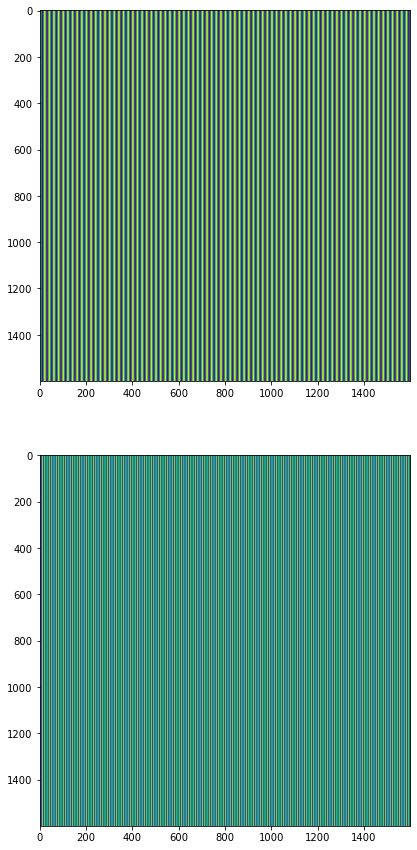

In [46]:
N = 1.5
L = 400*um 
del_x = 20*um
del_y = 20*um
wave_length = 633*nm
z = (N*(L**2)/wave_length)
mode = 'i'

trasmi = trans(1600, 1, L, del_x, del_y)

U_z = ang_spec(trasmi, del_x, del_y, wave_length, z)
magnitude=np.abs(U_z)**2
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
ax[0].imshow(trasmi)
ax[1].imshow(magnitude)
print(z)

In [50]:
#NewVector
z_propag=np.linspace(0,z,200)
H=np.shape(z_propag)[0]
M=np.shape(U_z)[0]
N=np.shape(U_z)[1]
talbot_im=np.zeros((H,M),dtype="complex")

for i in range(100):
    fila=np.abs(ang_spec(trasmi, del_x, del_y, wave_length, i*1.01*cm)[0,:])**2
    for j in range (1600):
        talbot_im[i,j]=fila[j]





Text(0, 0.5, 'Distancia z [cm]')

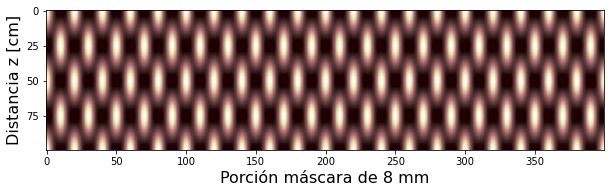

In [51]:
b=((np.abs(talbot_im[0:100,0:400])**2))
fig, ax = plt.subplots(figsize=[10, 10])
ax.imshow(b,cmap="pink")
yticks=np.arange(0,100,25)
ax.set_yticks(yticks)
plt.xlabel("Porción máscara de 8 mm", size = 16,)
plt.ylabel("Distancia z [cm]", size = 16,)

In [52]:
dist = M*del_x**2/wave_length
print(dist)
tam=round(del_x*np.shape(U_z)[1]*100, 2)
print(tam)
print(z)

1.0110584518167456
3.2
0.3791469194312796
